# Hill Climbing for the Travelling Sales Agent Problem

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github//ericmanley/ai_map_environments/blob/tsp/notebooks/tsp_hill_climb_lab.ipynb)

This notebook shows how to use the `TravellingSalesAgentProblem` class, which will allow you to try out solutions to the Travelling Salesperson Problem: https://en.wikipedia.org/wiki/Travelling_salesman_problem

If you are running on Colab or don't have the `mapbots` module installed, you need to run this:

In [ ]:
import sys
!{sys.executable} -m pip install mapbots

## Creating a map

You can create an instance of the travelling sales agent problem similar to how you created `StreetSweeperWorld` instances. It allows you to select a map of a real place. It will randomly generate an origin (shown in purple) and some number of destinations specified by `num_locations`. You can seed the random generator to try experiments on the same instance.

Note that it will try to come up with some descriptive names for the locations that it randomly generates. 

preparing map - this may take some time
calculating travel times - this may take some time


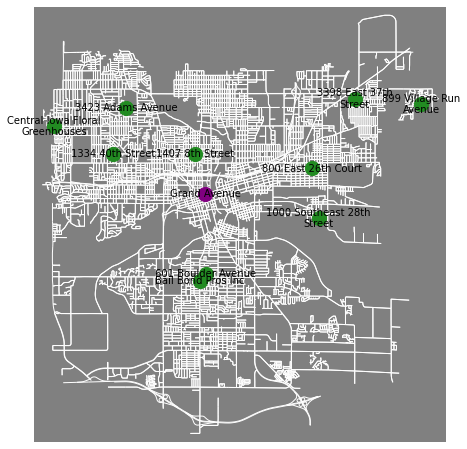

In [13]:
from mapbots import TravellingSalesAgentProblem

tsp_instance = TravellingSalesAgentProblem(place="Des Moines, Iowa, USA", num_locations=10, random_seed=4)
tsp_instance.display_map()

## Listing the destinations

The `get_destination_locations()` method will give you a list of the location ids for all of the destination locations.

In [14]:
destinations = tsp_instance.get_destination_locations()
destinations

['3398, East 37th Street, Grand View Acres, Des Moines, Polk County, Iowa, 50317, United States',
 'Bail Bond Pros Inc, 3300, Southwest 9th Street, Fort Des Moines, Des Moines, Polk County, Iowa, 50315, United States',
 'Central Iowa Floral Greenhouses, 6100, Hickman Road, Merle Hay, Des Moines, Polk County, Iowa, 50322, United States',
 '800, East 26th Court, Farewell Place, Des Moines, Polk County, Iowa, 50317, United States',
 '1407, 8th Street, River Bend, Des Moines, Polk County, Iowa, 50314, United States',
 '3423, Adams Avenue, Beaverdale, Des Moines, Polk County, Iowa, 50310, United States',
 '1000, Southeast 28th Street, Chesterfield, Des Moines, Polk County, Iowa, 50317, United States',
 '601, Boulder Avenue, Des Moines, Polk County, Iowa, 50315, United States',
 '899, Village Run Avenue, Brooke Run Village, Des Moines, Polk County, Iowa, 50317, United States',
 '1334, 40th Street, Des Moines, Polk County, Iowa, 50311, United States']

## Customizing with your own locations

You can also specify descriptive locations that you want it to search for and include. If it doesn't find enough of them, it will fill in the rest with random locations.

preparing map - this may take some time
calculating travel times - this may take some time


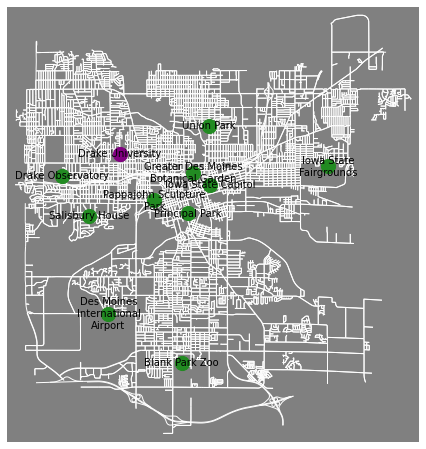

In [15]:
points_of_interest = ["Drake University",
                      "Iowa State Capitol",
                      "Blank Park Zoo",
                      "Greater Des Moines Botanical Garden",
                      "Iowa State Fairgrounds",
                      "Principal Park",
                      "Des Moines International Airport",
                      "Union Park, Des Moines",
                      "Drake Observatory",
                      "Pappajohn Sculpture Park", 
                      "Salisbury House"
                   ]
tsp_instance = TravellingSalesAgentProblem(place="Des Moines, Iowa, USA",locations=points_of_interest,num_locations=10)
tsp_instance.display_map()

And you can retrieve the actual list of destinations it found in the same way.

In [16]:
destinations = tsp_instance.get_destination_locations()
destinations

['Iowa State Capitol',
 'Blank Park Zoo',
 'Greater Des Moines Botanical Garden',
 'Iowa State Fairgrounds',
 'Principal Park',
 'Des Moines International Airport',
 'Union Park, Des Moines',
 'Drake Observatory',
 'Pappajohn Sculpture Park',
 'Salisbury House']

## Trying a TSP solution

A solution to TSP is a list of destination location ids - so the destinations list we got above is a valid one to try. You can display it on the map by passing the list to the optional `route` parameter when displaying the map.

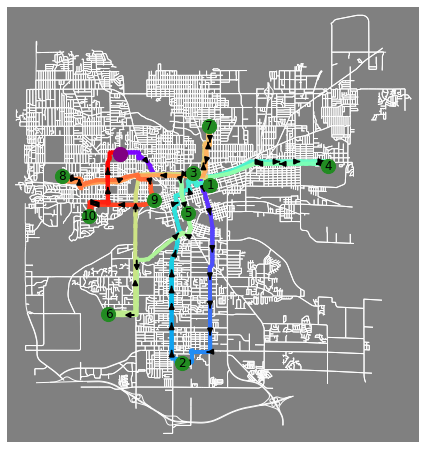

In [17]:
tsp_instance.display_map(route = destinations)

You can also calculate the total travel time with `route_travel_time()` like this:

In [18]:
route1_cost = tsp_instance.route_travel_time(route = destinations )
print(route1_cost)

5241.799999999999


## Generating a Successor Solution

Here's how you could write a function that swaps the order of two of the destinations - specified by indexes `i` and `j`.

In [19]:
def generate_successor(dest_list,i,j):
    dest_list_copy = dest_list[:] # make a copy so that we don't destroy the original list
    # three-step swap
    temp = dest_list_copy[i] # copy item i to a temp variable
    dest_list_copy[i] = dest_list_copy[j] # overwrite item i with item j
    dest_list_copy[j] = temp # set item j to be what was preiously in item i
    return dest_list_copy

Now we can try out a successor and see if it improves the overall travel time:

Here's the new route order: ['Iowa State Capitol', 'Blank Park Zoo', 'Drake Observatory', 'Iowa State Fairgrounds', 'Principal Park', 'Des Moines International Airport', 'Union Park, Des Moines', 'Greater Des Moines Botanical Garden', 'Pappajohn Sculpture Park', 'Salisbury House']
Here is its travel time: 5247.399999999999


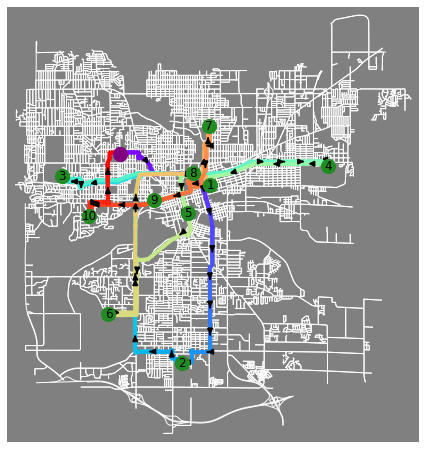

In [20]:
successor_route = generate_successor(destinations,2,7) # you can use any two indices
print("Here's the new route order:",successor_route)

print("Here is its travel time:", tsp_instance.route_travel_time(route = successor_route) )

tsp_instance.display_map(route = successor_route ) 

## Finding the successor with lowest travel time

What if we wanted to consider all possible successors to see which one has the lowest overall travel time? We could write a function for that.

In [21]:
def best_successor(tsp_instance,current_state):
    
    # keeps track of the state and score of the best successor state
    best_successor = None
    best_successor_score = float("inf") #infinity
    
    num_dests = len(current_state)
    
    # loop through all possible pairs of destinations
    for i in range(num_dests):
        for j in range(num_dests):
            if i != j: #skip swapping a location with itself
                # generate the next successor
                next_successor = generate_successor(current_state,i,j)
                # calculate its score
                next_successor_score = tsp_instance.route_travel_time(route = next_successor)
                # if is the best so far, keep track of it
                if next_successor_score < best_successor_score:
                    best_successor = next_successor
                    best_successor_score = next_successor_score
                    
    return best_successor
            

Successor state with lowest travel time: ['Des Moines International Airport', 'Blank Park Zoo', 'Greater Des Moines Botanical Garden', 'Iowa State Fairgrounds', 'Principal Park', 'Iowa State Capitol', 'Union Park, Des Moines', 'Drake Observatory', 'Pappajohn Sculpture Park', 'Salisbury House']
Travel time: 4316.099999999999


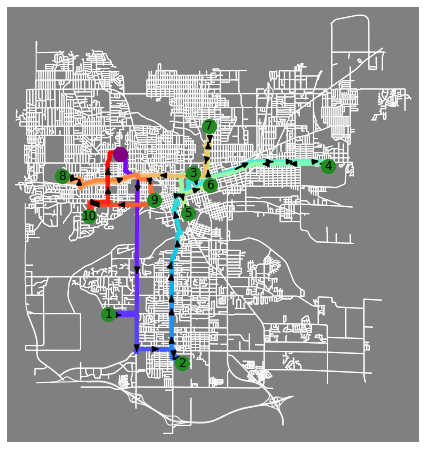

In [22]:
new_state = best_successor(tsp_instance,destinations)
print("Successor state with lowest travel time:",new_state)
print("Travel time:",tsp_instance.route_travel_time(route = new_state))
tsp_instance.display_map(route = new_state )

## Exercise: Implementing the Hill Climbing Algorithm

We are now ready to implement the full hill-climbing algorithm. Start with our pseudocode (for the minimization version) as comments:

In [ ]:
# function Hill-Climbing(problem) returns a state that is a local minimum
#
# local variables: current, a problem state
#                  neighbor, a problem state
#
# current ← initial problem state
# loop do
#      neighbor ← a lowest-valued successor state of current
#      if Value[neighbor] >= Value[current] 
#           then return State[current] 
#      current ← neighbor
# end

## Assignment 

For this assignment, you will implement an iterative improvement algorithm which attempts to avoid getting stuck in local minima like the hill-climbing algorithm does. This can be something like

* Add an improvement to hill-climbing like random restarts or random movement to get out of local minima
* Local beam search
* Simulated Annealing
* Genetic Algorithm



## What to turn in

Create a new notebook with both your hill-climbing code as well as what you completed for the assignment. Run both on a few maps to show that you bet the basic hill-climbing approach on average. Display some maps showing the difference.

Also, include a text/markdown cell in which you 

1. say what algorithmidea you implemented - if it is something non-standard, make sure to explain how it works
2. say what your successor states are - how are they generated from the current state?
3. give a short description of the results that you found

Share the notebook in the same way you did for Projects 1 and 2.

## Grading

The assignment will be worth 8 points.

* You can get up to 1 point if you turn in this starter notebook and you ran all the code yourself. Create a text/markdown cell at the top where you explain that's what you did.
* You can get up to 4 points if you implement a basic hill-climbing algorithm
* You can get up to 8 points if you implement an algorithm which attempts to avoid local minima and show it is successful through testing. 

If you have only a partial solution or are missing any of the text/markdown requirements, you can get somewhere between 5 and 7 points based on how far along you are.